# EDA

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as mingo
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import xgboost as xgb



In [79]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [80]:
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [81]:
df.shape

(48895, 16)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [83]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [84]:
print(df.isnull().sum())
print(df.duplicated().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
0


In [85]:
df.drop(['last_review','neighbourhood','host_name','reviews_per_month'], axis=1, inplace=True)

Eliminamos las columnas que consideramos poco influyentes para el analisis.

In [86]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [87]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
neighbourhood_group                   5
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [88]:
df.T.duplicated(keep=False)

id                                False
name                              False
host_id                           False
neighbourhood_group               False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


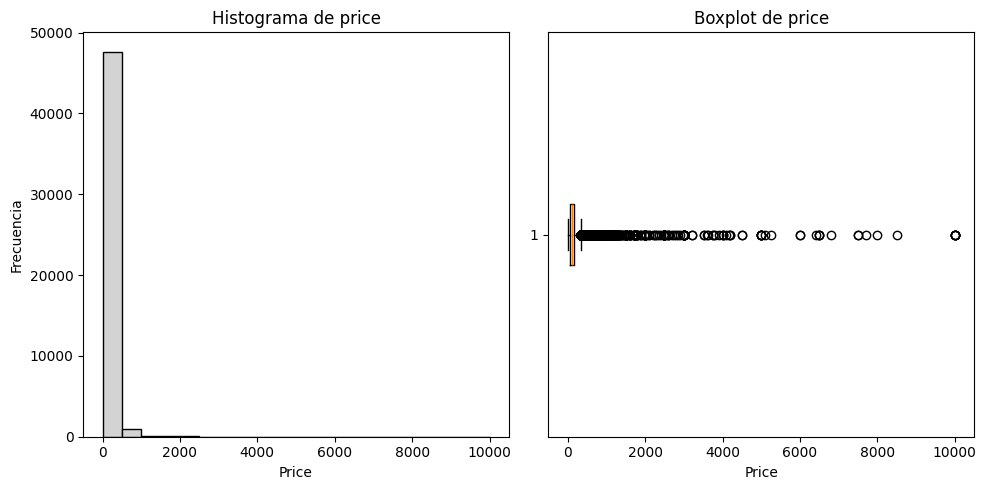

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(df['price'], bins=20, color='lightgray', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

In [91]:
df['LOG_price'] = (np.where(df['price'] > 0, np.log(df['price']), 0))

c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


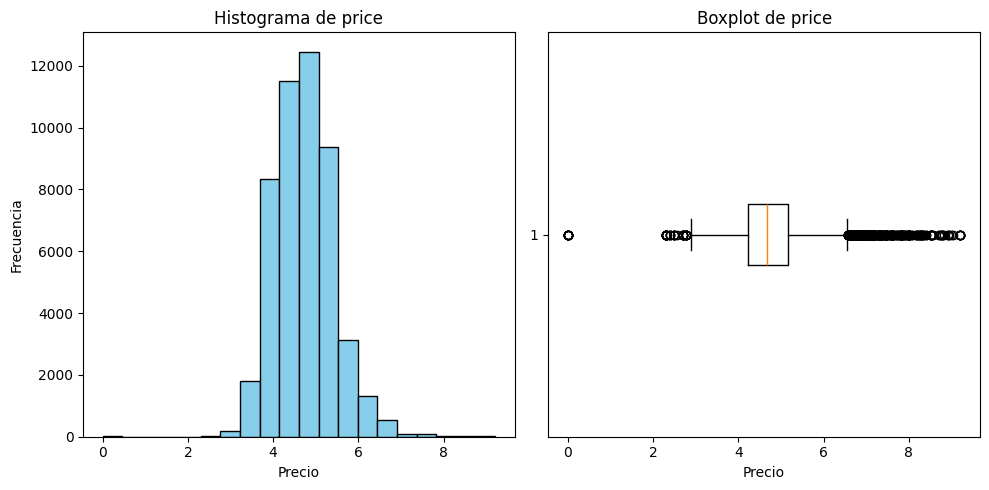

In [92]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].hist(df['LOG_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['LOG_price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()

In [93]:
df.isnull().mean()*100

id                                0.000000
name                              0.032723
host_id                           0.000000
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
LOG_price                         0.000000
dtype: float64

In [94]:
df.isnull().any(axis=1).sum()/len(df)*100

np.float64(0.03272318232948154)

<Axes: >

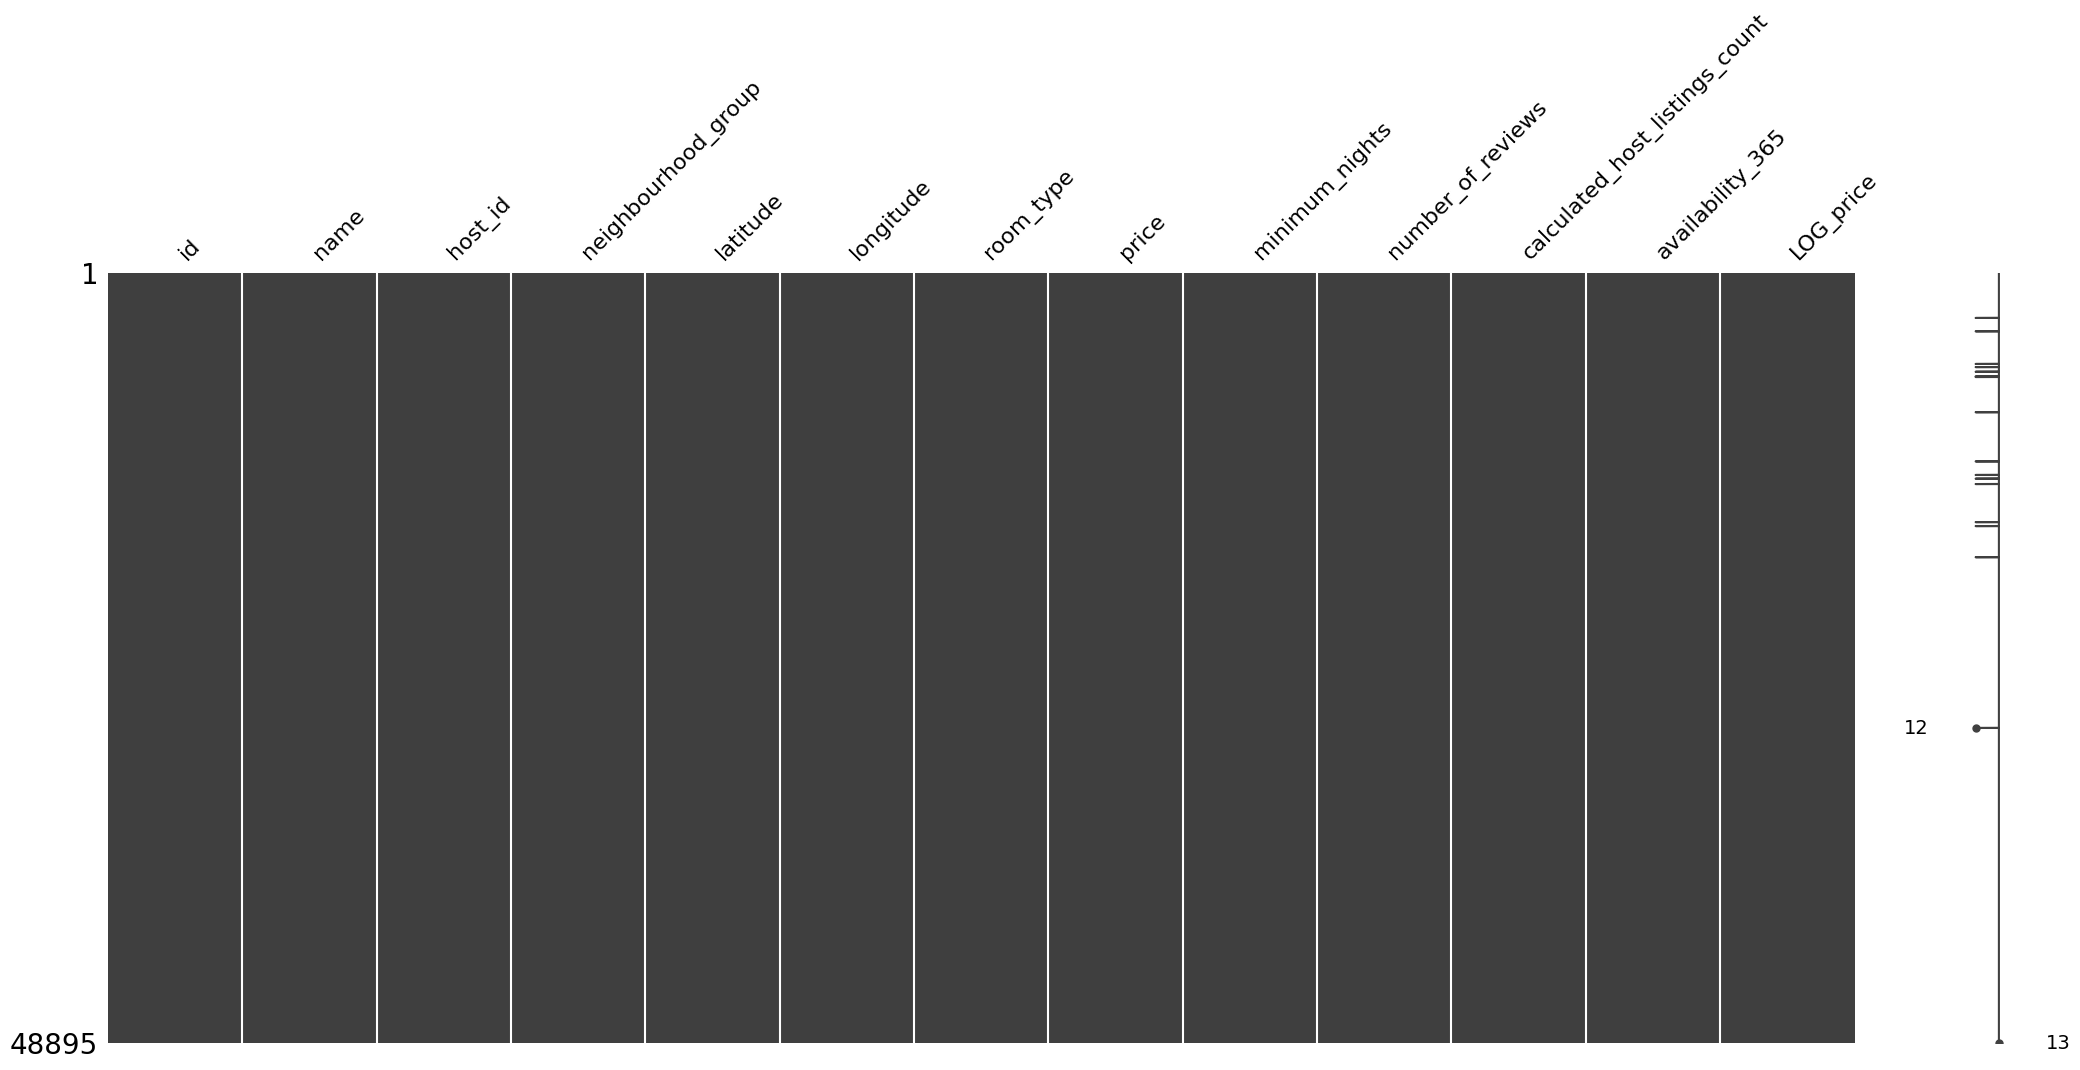

In [95]:
mingo.matrix(df)

He eliminado anteriormente las columnas que contenian valores nulos una como consecuencia de la otra. Por lo que esta no nos muestra valores que se esten solapando.

In [96]:
#prueba de missingno
df.isna().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
LOG_price                          0
dtype: int64

In [97]:
df.drop(['name'], axis=1, inplace=True)

In [98]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].isnull().sum()

print(df[num_cols].isnull().sum() / len(df) * 100)

id                                0.0
host_id                           0.0
latitude                          0.0
longitude                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
LOG_price                         0.0
dtype: float64


In [102]:
x = df[['minimum_nights', 'availability_365','calculated_host_listings_count', 'number_of_reviews']]
        
y = df['price']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print({x_train.shape}, {x_test.shape})

{(39116, 4)} {(9779, 4)}


Text(0, 0.5, "Cook's Distance")

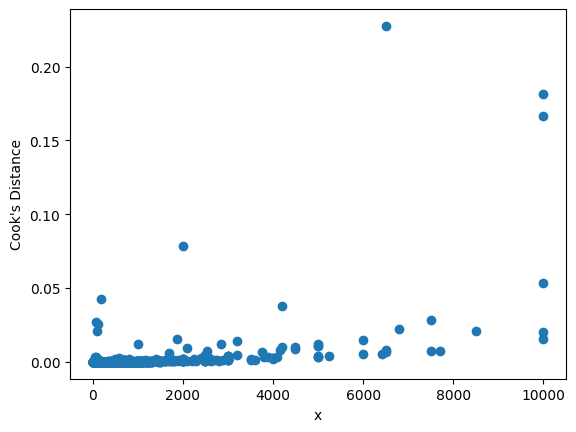

In [109]:
x_train_const = sm.add_constant(x_train)   
model = sm.OLS(y_train, x_train_const).fit()

cooks_distance = model.get_influence().cooks_distance[0]

plt.scatter(y_train, cooks_distance)    
plt.xlabel('x')
plt.ylabel('Cook\'s Distance')


In [110]:
pto_corte = 4 / len(x_train)

In [115]:
np.where(cooks_distance > pto_corte)

(array([   34,   247,   281,   322,   386,   414,   417,   463,   522,
          799,   895,   974,  1022,  1035,  1087,  1179,  1191,  1197,
         1296,  1314,  1505,  1563,  1611,  1631,  1637,  1717,  1795,
         1846,  1925,  1949,  1950,  2032,  2152,  2174,  2187,  2285,
         2331,  2370,  2515,  2693,  2763,  2843,  2932,  3098,  3125,
         3166,  3176,  3260,  3310,  3336,  3354,  3366,  3779,  4085,
         4209,  4210,  4251,  4259,  4292,  4293,  4364,  4371,  4405,
         4570,  4574,  4625,  4636,  4668,  4750,  4752,  4795,  4847,
         4901,  4947,  5321,  5384,  5416,  5616,  5625,  5674,  5737,
         5759,  5848,  6058,  6083,  6365,  6377,  6437,  6644,  6662,
         6667,  6684,  6705,  6767,  6874,  6911,  6956,  7021,  7031,
         7067,  7179,  7312,  7362,  7412,  7419,  7548,  8131,  8167,
         8173,  8218,  8283,  8289,  8383,  8426,  8546,  8605,  8614,
         8796,  8924,  9156,  9167,  9226,  9296,  9353,  9355,  9366,
      

In [116]:
x_train.iloc[39108, :]

minimum_nights                    30
availability_365                  97
calculated_host_listings_count     1
number_of_reviews                  0
Name: 37194, dtype: int64

In [121]:
idx_influencia = np.where(cooks_distance > pto_influencia)[0]
print ({len(idx_influencia)/len(df) * 100})

{1.1350853870538908}


In [123]:
x_train.index[idx_influencia]

Index([47400, 41224, 30259, 33430,  1426, 44736, 48301, 38776, 45572,  3622,
       ...
        6190,  5801,  3420, 43525, 40764, 46214, 30080, 11394,  1899, 37194],
      dtype='int64', length=555)

In [140]:
x_train1 = x_train.loc[x_train.index.isin(x_train.index[idx_influencia]),:]
y_train1 = y_train.loc[x_train.index.isin(x_train.index[idx_influencia])]

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(x_train1, y_train1)

dic_data = importances = xgb_model.feature_importances_ * 100
dic_data = {'feature': x_train1.columns, 'importance': importances}
df_imp = pd.DataFrame(dic_data)
print(df_imp)

                          feature  importance
0                  minimum_nights   31.715715
1                availability_365   17.058798
2  calculated_host_listings_count   30.021492
3               number_of_reviews   21.203999


In [146]:
x_train1.drop(df_imp[df_imp['importance'] < 10].index, axis=1, inplace=True )
x_test.drop(df_imp[df_imp['importance'] < 10].index, axis=1, inplace=True )  


C:\Users\juanm\AppData\Local\Temp\ipykernel_5488\630497199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train1.drop(df_imp[df_imp['importance'] < 10].index, axis=1, inplace=True )


In [147]:
x_train1.shape

(555, 4)